In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import cv2
from google.colab.patches import cv2_imshow

Extracting **zip** file

In [ ]:
import zipfile

def zipextractor(filename):
  with zipfile.ZipFile(filename, "r") as zip_ref:
    zip_ref.extractall("./")


In [ ]:
zipextractor("train.csv.zip")
zipextractor("test.csv.zip")

Reading CSV file


In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(42000, 785)

This dataset contain the data as the value of each pixel and it's label.

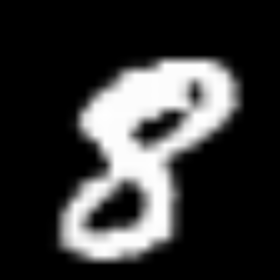

In [ ]:
img = np.array(df.iloc[10,1:785], dtype=np.uint8 )
img = img.reshape((28,28))
resized_img = cv2.resize(img, (280,280))
cv2_imshow(resized_img)

In [ ]:
X = df.drop("label", axis = 1)
y = df.label

In [ ]:
X_train, X_test, train_label, test_label = train_test_split(X,y,test_size = 0.2)

## **Normalization**

In [ ]:
def funct(data):
  data_img = np.array(data, dtype = np.float64)
  data_img /= 255
  return data_img

In [ ]:
test_img_norm = funct(X_test)
train_img_norm = funct(X_train)

In [ ]:
print(min(train_img_norm[1]), max(train_img_norm[1]))

0.0 1.0


In [ ]:
test_img_norm.shape

(8400, 784)

In [ ]:
test_img = np.reshape(test_img_norm, (-1,28,28,1))
train_img = np.reshape(train_img_norm, (-1,28,28,1))

In [ ]:
def to_category(labels):
  labels = keras.utils.to_categorical(labels)
  return labels

In [ ]:
train_labels = to_category(train_label)
test_labels = to_category(test_label)

Building the Convolutional Neural Network

In [ ]:
model = Sequential()
model.add(Conv2D(128,(3,3),padding = "valid", activation = "relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.1))

model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.1))

model.add(Dense(10, activation = "softmax"))
model.add(Dropout(0.1))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_img, train_labels, epochs=20, batch_size=32, validation_data = (test_img, test_labels))


Epoch 1/20
1050/1050 [==============================] - 18s 6ms/step - loss: 2.1590 - accuracy: 0.7189 - val_loss: 0.1586 - val_accuracy: 0.9523
Epoch 2/20
1050/1050 [==============================] - 5s 5ms/step - loss: 1.8013 - accuracy: 0.8396 - val_loss: 0.1140 - val_accuracy: 0.9657
Epoch 3/20
1050/1050 [==============================] - 6s 6ms/step - loss: 1.7419 - accuracy: 0.8564 - val_loss: 0.1018 - val_accuracy: 0.9707
Epoch 4/20
1050/1050 [==============================] - 6s 5ms/step - loss: 1.7427 - accuracy: 0.8639 - val_loss: 0.0790 - val_accuracy: 0.9769
Epoch 5/20
1050/1050 [==============================] - 6s 5ms/step - loss: 1.6901 - accuracy: 0.8701 - val_loss: 0.0762 - val_accuracy: 0.9777
Epoch 6/20
1050/1050 [==============================] - 6s 5ms/step - loss: 1.6784 - accuracy: 0.8724 - val_loss: 0.0710 - val_accuracy: 0.9794
Epoch 7/20
1050/1050 [==============================] - 6s 6ms/step - loss: 1.7482 - accuracy: 0.8698 - val_loss: 0.0853 - val_accuracy

In [ ]:
performance = pd.DataFrame(model.history.history)

<Axes: >

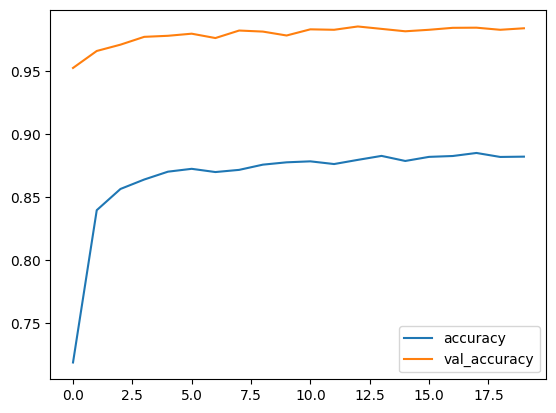

In [ ]:
performance[["accuracy", "val_accuracy"]].plot()

<Axes: >

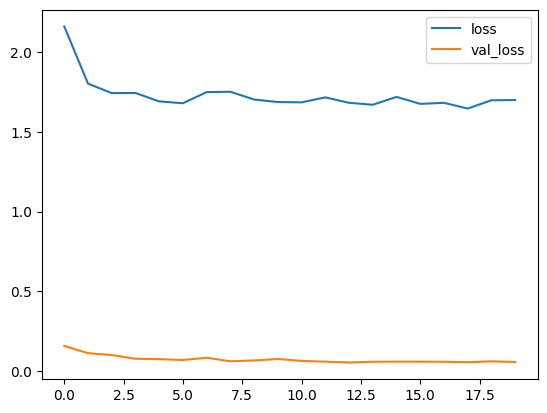

In [ ]:
performance[["loss", "val_loss"]].plot()

In [ ]:
probabilities = model.predict(test_img[:5])

1/1 [==============================] - 0s 217ms/step


In [ ]:
print("True labels: " , np.argmax(test_labels[:5], axis = 1))
print("Predicted Labels: ", np.argmax(probabilities, axis = 1))

True labels:  [6 7 7 6 2]
Predicted Labels:  [6 7 7 6 2]
